In [4]:
#!conda install scipy --y

1.233700465609852
4.934803481559232
11.103308503022447


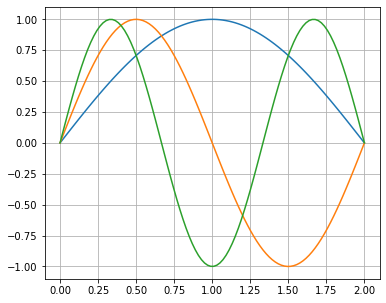

1.233700465609852
4.934803481559232
11.103308503022447


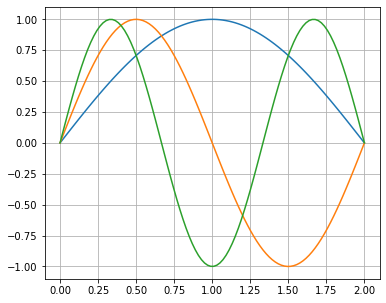

In [5]:
"""--------------------------------------------------------------*
Solution of Shrodinger Equation for the hard wall potential :

inside the potential well we have a step V = V0, i.e


-0.5*Psi'' = E*Psi (inside the potential well) -----(1)

where 

V = V0        for  x in [L/4,3L/4]
V = 0         for  x in [0,L/4[ U ]3L/4,L]
V = Infinity   ortherwise

Below are the the  solutions without the step, i.e. hard wall potential :

Psi_n(x) = sqrt(2/L)*sin(n*w*x) see below ...

E_n = (n**2)*E0  

-----------------------------------------------------------------*
"""
import  numpy as np
import  matplotlib.pyplot  as plt        
from    scipy.integrate import odeint
from    scipy.integrate import simps
from    scipy.optimize  import brentq


"""
Using the scipy ODE solver odeint

The problem 

-0.5*Psi'' = E*Psi

should be formulates as 

Psi' = z
                     ------- (2)
z'   = -2*E*psi




V0  = 50.0

This  function provides the derivatives of the tuple(Psi,z)
(Psi, z) ----> func ---->(Psi',z')
""" 

L = 2.0
N = 100
x = np.linspace(0,L,N)
h = x[1]-x[0]

def func(initVal,x,E):
    psi, z = initVal
    return [z, -2*E*psi]

E = 1.0

# psi' = (1E-3 - 0)/h this method is sensitive to this value
# psi_0= 0, I chose psi_1=1E-3, hence the initial condition below
initVal = [0 , 1.0E-3/h] # Psi(0) =0, momentum 1E-4 very small


"""
Usint the shooting method, E is tuned as to make psi(L)=0
"""

def shoot(E):
    sol = odeint(func, initVal, x, args=(E,))  
    psi = sol[:,0]
    psi = psi/max(np.abs(psi))
    return (psi[-1])
    
"""
looking for first eigen value

"""

Erange = [np.float64(r+1) for r in range(15)] # engergies from 1...16
dE = 1.0
Psi = []
for E0 in Erange:
    if (shoot(E0)*shoot(E0+dE)<0): # if solution exists in the interval
        En = brentq(shoot, E0, E0+dE, args=())
        # finding the wave function
        y = odeint(func, initVal, x, args=(En,))
        psi = y[:,0]
        norm = simps(psi**2, dx = h)
        psi = psi/np.sqrt(norm)
        Psi.append(psi)
        print(En)

plt.figure(figsize=[6,5])
plt.grid()
plt.plot(x,Psi[0])
plt.plot(x,Psi[1])
plt.plot(x,Psi[2])
plt.show()


L   = 2.0
a   = 0.5
b   = 1.5

def V(x):
    if (x>=a and x>=b):
        return V0
    else:
        return 0.0


"""
This  function provides the derivatives of the tuple(Psi,z)
(Psi, z) ----> func ---->(Psi',z')
""" 

L = 2.0
N = 100
x = np.linspace(0,L,N)
h = x[1]-x[0]

def func(initVal,x,E):
    psi, z = initVal
    return [z, -2*E*psi]

E = 1.0

# psi' = (1E-3 - 0)/h this method is sensitive to this value
# psi_0= 0, I chose psi_1=1E-3, hence the initial condition below
initVal = [0 , 1.0E-3/h] # Psi(0) =0, momentum 1E-4 very small


"""
Usint the shooting method, E is tuned as to make psi(L)=0
"""

def shoot(E):
    sol = odeint(func, initVal, x, args=(E,))  
    psi = sol[:,0]
    psi = psi/max(np.abs(psi))
    return (psi[-1])
    
"""
looking for first eigen value

"""

Erange = [np.float64(r+1) for r in range(15)] # engergies from 1...16
dE = 1.0
Psi = []
for E0 in Erange:
    if (shoot(E0)*shoot(E0+dE)<0): # if solution exists in the interval
        En = brentq(shoot, E0, E0+dE, args=())
        # finding the wave function
        y = odeint(func, initVal, x, args=(En,))
        psi = y[:,0]
        norm = simps(psi**2, dx = h)
        psi = psi/np.sqrt(norm)
        Psi.append(psi)
        print(En)

plt.figure(figsize=[6,5])
plt.grid()
plt.plot(x,Psi[0])
plt.plot(x,Psi[1])
plt.plot(x,Psi[2])
plt.show()


